In [190]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
plt.rcdefaults()

In [191]:
df_original = pd.read_csv('Full Dataset.csv',index_col=0)
df = df_original.copy()
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Year_x', 'MVP_Rank', 'MVP_First', 'MVP_Pts Won', 'MVP_Pts Max',
       'MVP_Share'],
      dtype='object')

In [231]:
year = 2000
df[ (df.MVP_Share != 0) & (df.Year_x == year)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OBPM,DBPM,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share
7294,Darrell Armstrong,1,31,ORL,82,82,31.6,5.9,13.6,0.433,...,3.6,0.9,4.5,4.3,2000,13.0,0.0,1.0,1210.0,0.001
7336,Kobe Bryant,2,21,LAL,66,62,38.2,8.4,17.9,0.468,...,3.5,1.6,5.1,4.5,2000,12.0,0.0,3.0,1210.0,0.002
7350,Vince Carter,3,23,TOR,82,82,38.1,9.6,20.7,0.465,...,5.6,-0.1,5.5,5.9,2000,10.0,0.0,51.0,1210.0,0.042
7397,Tim Duncan,4,23,SAS,74,74,38.9,8.5,17.3,0.490,...,3.8,1.8,5.6,5.5,2000,5.0,0.0,248.0,1210.0,0.205
7410,Michael Finley,3,26,DAL,82,82,42.2,9.1,20.0,0.457,...,3.0,-0.9,2.1,3.6,2000,13.0,0.0,1.0,1210.0,0.001
7420,Kevin Garnett,4,23,MIN,81,81,40.0,9.4,18.8,0.497,...,4.6,1.7,6.3,6.8,2000,2.0,0.0,408.0,1210.0,0.337
7455,Grant Hill,3,27,DET,74,74,37.5,9.4,19.2,0.489,...,5.4,0.1,5.4,5.2,2000,8.0,0.0,113.0,1210.0,0.093
7467,Allen Iverson,2,24,PHI,70,70,40.8,10.4,24.8,0.421,...,3.4,-0.2,3.2,3.8,2000,7.0,1.0,132.0,1210.0,0.109
7495,Jason Kidd,1,26,PHO,67,67,39.0,5.2,12.8,0.409,...,2.3,2.0,4.3,4.2,2000,11.0,0.0,25.0,1210.0,0.021
7523,Karl Malone,4,36,UTA,82,82,35.9,9.2,18.0,0.509,...,6.4,1.1,7.5,7.1,2000,4.0,0.0,312.0,1210.0,0.258


In [221]:
df = df[(df.GS/df.G > .8) & (df.MP > 10) ]

X = df.drop(columns=['Player','Tm','MVP_Rank', 'MVP_First', 'MVP_Pts Won', 'MVP_Pts Max','MVP_Share',])


X_train = X.loc[X['Year_x'] != year,:]
X_test = X.loc[X['Year_x'] == year,:]
y_train = df.loc[df['Year_x'] != year,['MVP_Share']]
y_test = df.loc[df['Year_x'] == year,['MVP_Share']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.drop(columns=['Year_x'],inplace=True)
X_test.drop(columns=['Year_x'],inplace=True)

print(len(X_train) == len(y_train))
print(len(X_test) == len(y_test))
# print(y_test.shape)

True
True


/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [222]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)



/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_1752/165094570.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


RandomForestRegressor()

<AxesSubplot:xlabel='feat_imp', ylabel='index'>

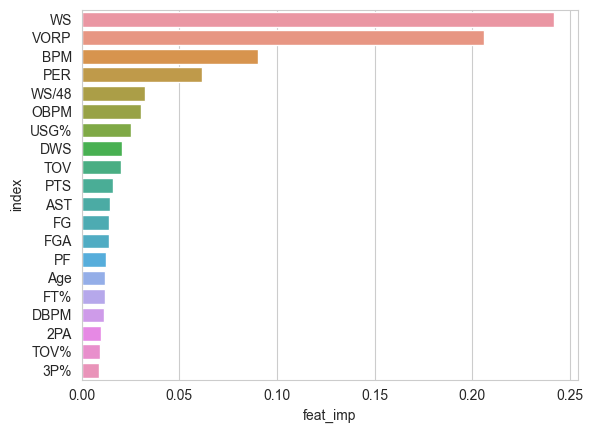

In [223]:
feat_importances = pd.Series(rfr.feature_importances_, index=X.drop(columns=['Year_x']).columns)

feat_importances = feat_importances.reset_index()
feat_importances.columns = ['index','feat_imp']

sns.barplot(x='feat_imp',y='index',data=feat_importances.nlargest(20,columns=['feat_imp']).sort_values(ascending=False,by='feat_imp'))

In [224]:
pred = pd.DataFrame(rfr.predict(X_test),columns=['Predicted_y'])

ValueError: Found array with 0 sample(s) (shape=(0, 47)) while a minimum of 1 is required.

In [207]:
mean_squared_error(y_test,pred)

0.0021682400626728106

In [208]:
results = pd.DataFrame(np.column_stack((df.loc[X_test.index,['Player','Year_x']],pred,y_test)),columns=['Player','Year','Pred_MVP','Actual_MVP'])

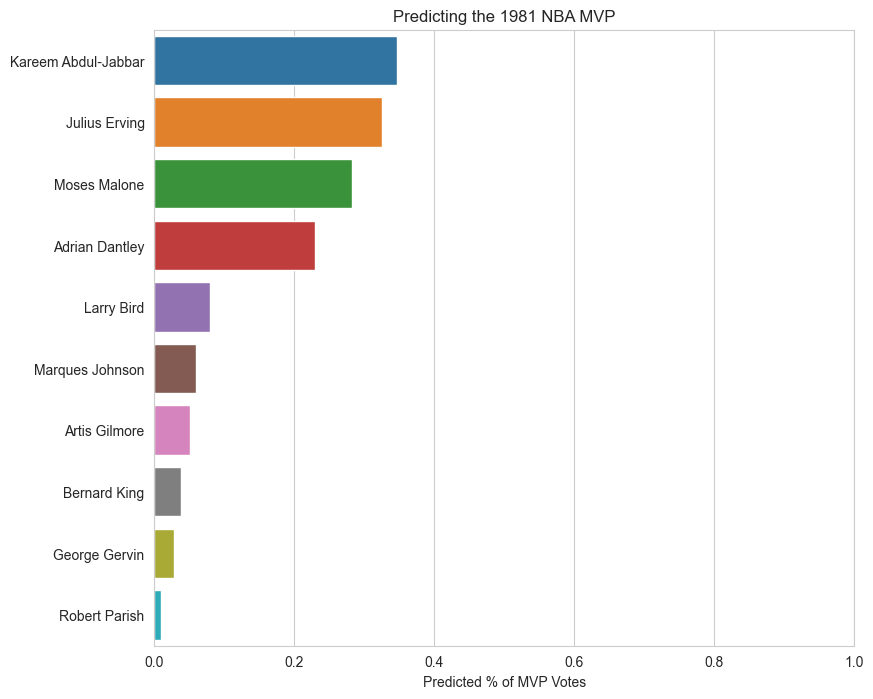

In [216]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8),)
sns.barplot(x='Pred_MVP',y='Player',data=results.sort_values('Pred_MVP',ascending=False).head(10),ci=False,)
plt.ylabel('')
plt.xlabel('Predicted % of MVP Votes')
plt.title(f'Predicting the {year} NBA MVP')
plt.xlim(left=0,right=1)
plt.subplots_adjust(left=0.2, )

plt.savefig(f'plots/pred/{year}_predicted_MVP_RandomForest.png')


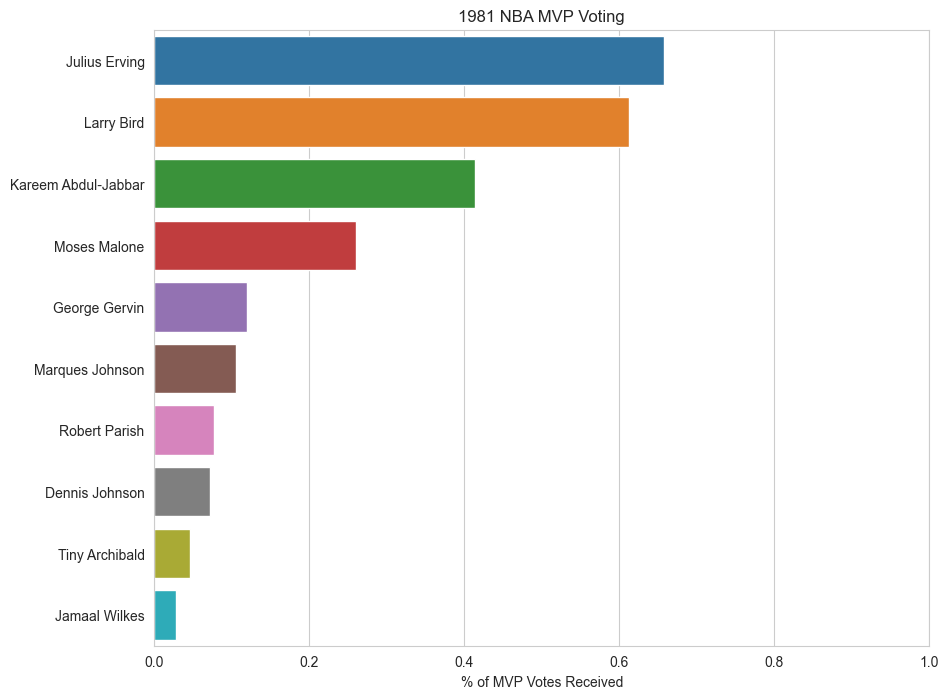

In [212]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8),)
sns.barplot(x='Actual_MVP',y='Player',data=results.sort_values('Actual_MVP',ascending=False).head(10),ci=False,)
plt.ylabel('')
plt.xlabel('% of MVP Votes Received')
plt.title(f'{year} NBA MVP Voting')
plt.xlim(left=0,right=1)
plt.savefig(f'plots/actual/{year}_MVP_Actual.png')

In [211]:
results.sort_values('Actual_MVP',ascending=False).head(10)

,Player,Year,Pred_MVP,Actual_MVP
58,Julius Erving,1981,0.32469,0.658
9,Larry Bird,1981,0.07992,0.613
0,Kareem Abdul-Jabbar,1981,0.34675,0.414
131,Moses Malone,1981,0.28186,0.261
66,George Gervin,1981,0.02813,0.12
98,Marques Johnson,1981,0.05999,0.106
157,Robert Parish,1981,0.00923,0.077
94,Dennis Johnson,1981,0.00209,0.072
2,Tiny Archibald,1981,0.00132,0.046
208,Jamaal Wilkes,1981,0.0043,0.028
